In [11]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
Epoch=6

In [70]:
#产生高斯金字塔
def generate_Gauss(G):
    gpG=[G]
    for i in range(Epoch):
        G=cv.pyrDown(G)#下采样
        gpG.append(G)
    return gpG

In [71]:
#产生拉普拉斯金字塔
def generate_Laplace(gpG):
    lpG=[gpG[Epoch-1]]
    for i in range(Epoch-1,0,-1):
        gpG_=cv.pyrUp(gpG[i])#膨胀扩张操作
        lp=cv.subtract(gpG[i-1],gpG_)
        lpG.append(lp)
    return lpG

In [72]:
#融合算法
def combination(lpA,lpB):
    ls=[]
    for la,lb in zip(lpA,lpB):
        h,w,dpt=la.shape
        ls_=np.hstack((la[:,0:w//2], lb[:,w//2:]))
        ls.append(ls_)
    #重构
    ls_=ls[0]
    for i in range(1,Epoch):
        ls_=cv.pyrUp(ls_)
        ls_=cv.add(ls_,ls[i])
    return ls_

In [19]:
#读取图片
A=cv.imread("C://Users//86187//Desktop//study//code//python//pic//apple.jpeg")
B=cv.imread("C://Users//86187//Desktop//study//code//python//pic//orange.jpeg")
#更改图片大小
x=Image.open("C://Users//86187//Desktop//study//code//python//pic//apple.jpeg")
A=cv.resize(A,(256,256))
B=cv.resize(B,(256,256))
h,w,dpt=A.shape

[[[ 19.  17.  18.]
  [ 15.  13.  14.]
  [ 16.  14.  15.]
  ...
  [ 31.  33.  28.]
  [ 30.  32.  27.]
  [ 26.  28.  25.]]

 [[ 86.  87.  71.]
  [ 83.  84.  68.]
  [ 84.  85.  69.]
  ...
  [125. 130. 107.]
  [127. 132. 110.]
  [125. 130. 108.]]

 [[106. 110.  73.]
  [106. 110.  73.]
  [106. 111.  71.]
  ...
  [151. 160. 115.]
  [156. 165. 122.]
  [155. 164. 121.]]

 ...

 [[105. 147. 111.]
  [102. 142. 107.]
  [106. 143. 109.]
  ...
  [ 90. 107.  89.]
  [ 93. 110.  91.]
  [ 94. 111.  92.]]

 [[112. 156. 120.]
  [111. 153. 117.]
  [112. 152. 117.]
  ...
  [102. 121. 102.]
  [107. 126. 107.]
  [110. 129. 110.]]

 [[112. 156. 120.]
  [108. 152. 116.]
  [109. 151. 115.]
  ...
  [115. 133. 117.]
  [117. 136. 117.]
  [115. 134. 115.]]]
--------------
[[[ 18.  17.  19.]
  [ 14.  13.  15.]
  [ 15.  14.  16.]
  ...
  [ 28.  33.  31.]
  [ 27.  32.  30.]
  [ 25.  28.  26.]]

 [[ 71.  87.  86.]
  [ 68.  84.  83.]
  [ 69.  85.  84.]
  ...
  [107. 130. 125.]
  [110. 132. 127.]
  [108. 130. 125.]]

 [[

In [74]:
#产生高斯金字塔
gpA=generate_Gauss(A)
gpB=generate_Gauss(B)

In [75]:
#产生拉普拉斯金字塔
lpA=generate_Laplace(gpA)
lpB=generate_Laplace(gpB)

In [76]:
#融合产生图片
pyr_combination=combination(lpA,lpB)
#直接产生图片
direct_combination=np.hstack((A[:,:w//2],B[:,w//2:]))

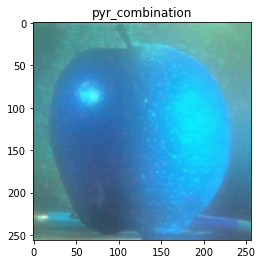

In [77]:
plt.imshow(pyr_combination)
plt.title("pyr_combination")
plt.show()

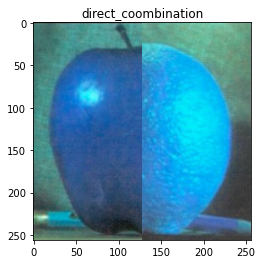

In [78]:
plt.imshow(direct_combination)
plt.title("direct_coombination")
plt.show()

In [79]:
cv.imwrite('Pyramid_combination'+str(Epoch)+".jpg",pyr_combination)
cv.imwrite('Direct_combination'+str(Epoch)+".jpg",direct_combination)

True